In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Exploring the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [4]:
df = df.drop(["loan_id"],axis=1)
df.head()

#Dropping Unnecessary Columns

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   no_of_dependents          4269 non-null   int64 
 1   education                 4269 non-null   object
 2   self_employed             4269 non-null   object
 3   income_annum              4269 non-null   int64 
 4   loan_amount               4269 non-null   int64 
 5   loan_term                 4269 non-null   int64 
 6   cibil_score               4269 non-null   int64 
 7   residential_assets_value  4269 non-null   int64 
 8   commercial_assets_value   4269 non-null   int64 
 9   luxury_assets_value       4269 non-null   int64 
 10  bank_asset_value          4269 non-null   int64 
 11  loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


# Encoding the Features

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df["education"] = le.fit_transform(df["education"])
df["self_employed"] = le.fit_transform(df["self_employed"])
df["loan_status"] = le.fit_transform(df["loan_status"])

In [8]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [9]:
df.describe().T.style.background_gradient(cmap='Greens')

,count,mean,std,min,25%,50%,75%,max
no_of_dependents,4269.000000,2.498712,1.695910,0.000000,1.000000,3.000000,4.000000,5.000000
education,4269.000000,0.497775,0.500054,0.000000,0.000000,0.000000,1.000000,1.000000
self_employed,4269.000000,0.503631,0.500045,0.000000,0.000000,1.000000,1.000000,1.000000
income_annum,4269.000000,5059123.916608,2806839.831818,200000.000000,2700000.000000,5100000.000000,7500000.000000,9900000.000000
loan_amount,4269.000000,15133450.456781,9043362.984843,300000.000000,7700000.000000,14500000.000000,21500000.000000,39500000.000000
loan_term,4269.000000,10.900445,5.709187,2.000000,6.000000,10.000000,16.000000,20.000000
cibil_score,4269.000000,599.936051,172.430401,300.000000,453.000000,600.000000,748.000000,900.000000
residential_assets_value,4269.000000,7472616.537831,6503636.587664,-100000.000000,2200000.000000,5600000.000000,11300000.000000,29100000.000000
commercial_assets_value,4269.000000,4973155.305692,4388966.089638,0.000000,1300000.000000,3700000.000000,7600000.000000,19400000.000000
luxury_assets_value,4269.000000,15126305.926446,9103753.665256,300000.000000,7500000.000000,14600000.000000,21700000.000000,39200000.000000


# Data Visualization

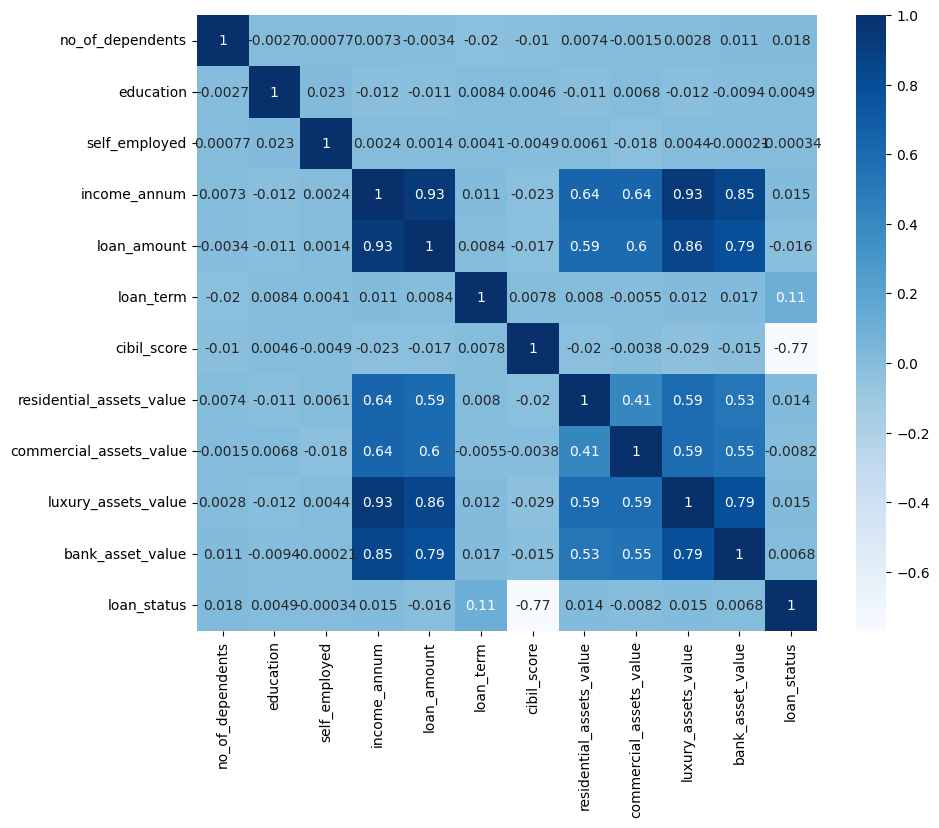

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

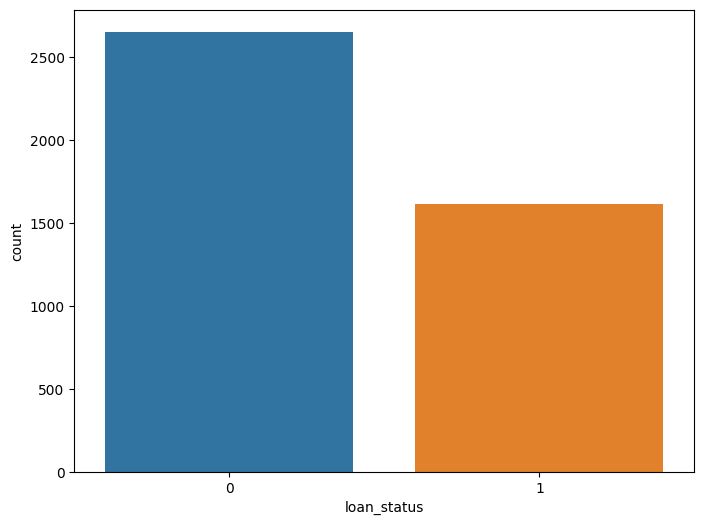

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="loan_status")
plt.show()

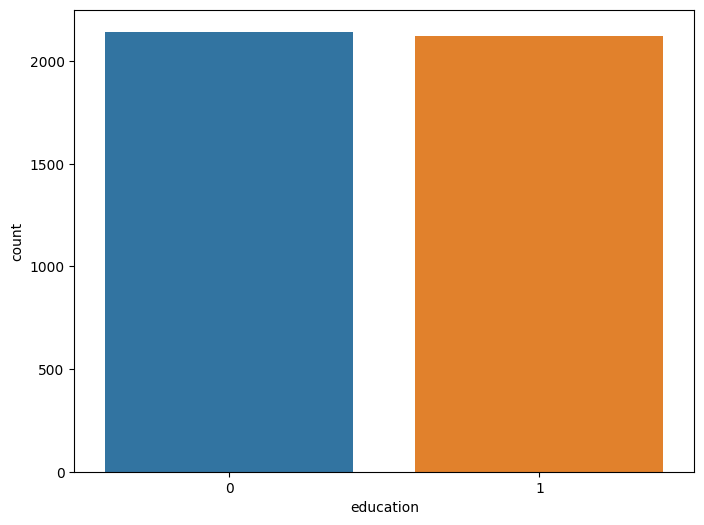

In [12]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="education")
plt.show()

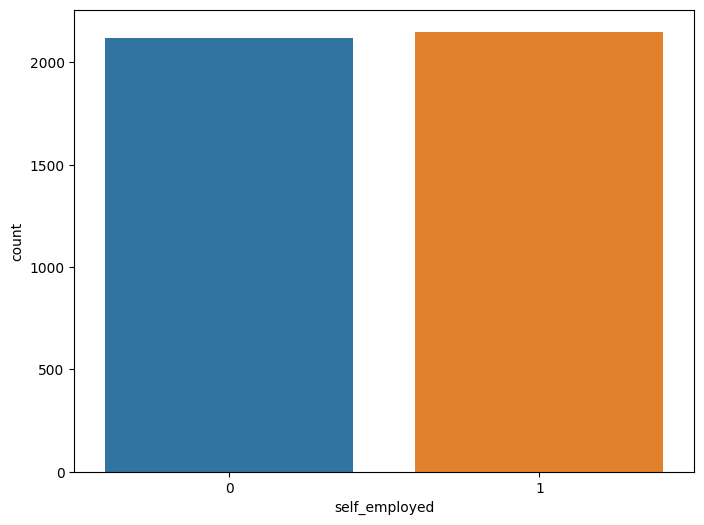

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(df,x="self_employed")
plt.show()

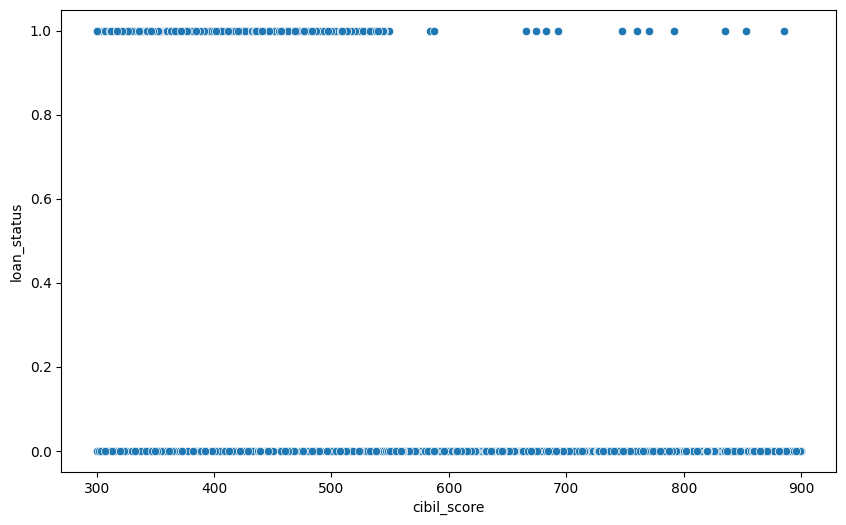

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='cibil_score',y='loan_status',data=df)
plt.show()

# Data Preparation and Split

In [15]:
x = df.drop(["loan_status"],axis=1)
y = df["loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.69      0.93      0.80       512
           1       0.79      0.38      0.52       342

    accuracy                           0.71       854
   macro avg       0.74      0.66      0.66       854
weighted avg       0.73      0.71      0.68       854

Accuracy of Logistic Regression is :  71.31147540983606


In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.28688524590163933
Mean Squared Error :  0.28688524590163933
Root Mean Squared Error :  0.5356166968099849
R2 Score :  -0.19488989400584789


# Decision Tree

In [18]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       512
           1       0.98      0.98      0.98       342

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree is :  98.36065573770492


In [19]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.01639344262295082
Mean Squared Error :  0.01639344262295082
Root Mean Squared Error :  0.12803687993289598
R2 Score :  0.9317205774853801


# Random Forest

In [20]:
import pickle
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

with open('random_forest_classifier.pkl', 'wb') as file:
    pickle.dump(rf, file)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       512
           1       0.98      0.97      0.98       342

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Random Forest is is :  98.24355971896955


In [21]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.01756440281030445
Mean Squared Error :  0.01756440281030445
Root Mean Squared Error :  0.13253076175101555
R2 Score :  0.926843475877193


# Model Performance Evaluation

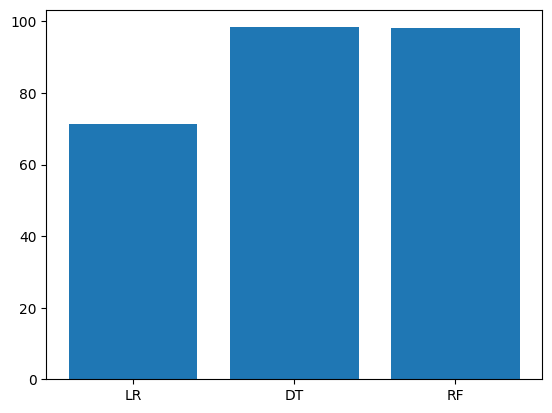

In [22]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

# Feature Importance

In [23]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                     feature  importance
6                cibil_score    0.816486
5                  loan_term    0.059862
4                loan_amount    0.028316
3               income_annum    0.018184
9        luxury_assets_value    0.016916
7   residential_assets_value    0.016665
8    commercial_assets_value    0.015901
10          bank_asset_value    0.015001
0           no_of_dependents    0.007672
1                  education    0.002640
2              self_employed    0.002355


# Conclusion

1. Loan Status is negatively correlated to Cibil Score. Becuase during Label Encoding, Approved was encoded as 0 and Non approval as 1. One can also use get dummies and one hot encoding.

2. Cibil score has the highest importance score to predict the Loan Status.And other features followed by less significance or impact.

3. No Data Imbalance was found, Model performance is justified.

4. There are mix of categorical features and numerical features. As expected, Decision Tree and Random Forest outperformed with high accuracy and significantly better precision, recall and F1 score.

**Thank you..**